# 数据分析与可视化

### 主要任务
   
   **任务1.2** 计算每台售货机2017年5月份的交易额、订单量及所有售货机交易总额和订单总量。
   
   **任务1.3** 计算每台售货机每月的每单平均交易额与日均订单量。
   
   **任务2.1** 绘制2017年6月销量前5的商品销量柱状图。
   
   **任务2.2** 绘制每台售货机每月总交易额折线图及交易额月环比增长率柱状图
   
   **任务2.3** 绘制每台售货机毛利润占总毛利润比例的饼图(假设饮料类毛利润为25%，非饮料类为20%)
   
   **任务2.4** 绘制每月交易额均值气泡图，横轴为时间，纵轴为商品的二级类目。
   
   **任务2.5** 绘制售货机6、7、8三个月订单量的热力图，横轴以天为单位，纵轴以小时为单位。

### 加载数据

In [1]:
# 加载模块
from datetime import datetime
from dateutil.relativedelta import relativedelta
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
# 指定画图默认字体
mpl.rcParams['font.sans-serif'] = [u'SimHei']
mpl.rcParams['axes.unicode_minus'] = False

# 打开各数据 csv 文件
task1_1A = open(r'..\数据预处理\各售货机销售信息\task1-1A.csv')
task1_1B = open(r'..\数据预处理\各售货机销售信息\task1-1B.csv')
task1_1C = open(r'..\数据预处理\各售货机销售信息\task1-1C.csv')
task1_1D = open(r'..\数据预处理\各售货机销售信息\task1-1D.csv')
task1_1E = open(r'..\数据预处理\各售货机销售信息\task1-1E.csv')
table_all =  open(r'..\数据预处理\各售货机销售信息\销售数据总表(带标签).csv')

# 加载数据
sales_A = pd.read_csv(task1_1A, parse_dates = ['支付时间'])    # 售货机 A 交易数据
sales_B = pd.read_csv(task1_1B, parse_dates = ['支付时间'])    # 售货机 B 交易数据
sales_C = pd.read_csv(task1_1C, parse_dates = ['支付时间'])    # 售货机 C 交易数据
sales_D = pd.read_csv(task1_1D, parse_dates = ['支付时间'])    # 售货机 D 交易数据
sales_E = pd.read_csv(task1_1E, parse_dates = ['支付时间'])    # 售货机 E 交易数据
sales_all = pd.read_csv(table_all, parse_dates = ['支付时间']) # 所有售货机交易数据，用于任务2.1、2.4

# 关闭文件
task1_1A.close()
task1_1B.close()
task1_1C.close()
task1_1D.close()
task1_1E.close()
table_all.close()

### 任务1.2 计算每台售货机2017年5月份的交易额、订单量及所有售货机交易总额和订单总量

In [2]:
# 划分5月时间
low = datetime(2017,5,1,0)
high = datetime(2017,6,1,0)
t_list = [sales_A, sales_B, sales_C, sales_D, sales_E]

# 筛选五月份各售货机交易信息
may_list = list(map(lambda x : x[(x['支付时间']>=low) & (x['支付时间']<high)], t_list))
# 计算各售货机五月份交易额和订单量
sales_sum = list(map(lambda x : {'交易额' : x['应付金额'].sum(), '订单量' : x.count()[0]}, may_list))

# 构建透视表
task1_2table = pd.DataFrame({
    'A' : sales_sum[0],
    'B' : sales_sum[1],
    'C' : sales_sum[2],
    'D' : sales_sum[3],
    'E' : sales_sum[4],
})
# 添加交易总额和订单总量
task1_2table['合计'] = task1_2table.sum(axis = 1)
task1_2table.head()

A       B       C       D       E       合计
交易额  3385.1  3681.2  3729.4  2392.1  5699.0  18886.8
订单量   756.0   869.0   789.0   564.0  1292.0   4270.0

### 任务1.3 计算每台售货机每月的每单平均交易额与日均订单量

In [3]:
all_months = [datetime(2017,1,1,0) + relativedelta(months= +i) for i in range(12)] # 每个月第一天

# 计算一台机器 12 个月的平均交易额与订单量
def all_month_table (machine):
    a_month_sales = list(map(lambda x : machine[(machine['支付时间']>=x) & 
                        (machine['支付时间']<x + relativedelta(months= +1))], all_months)) # 该机器每月的销售数据
    # 构建透视表
    machine_table = pd.DataFrame(index=['每单平均交易额','日均订单量'])
    # 计算每个月平均报表
    for i,m in enumerate(a_month_sales):
        
        money = round(m['应付金额'].sum()/m.count()[0], 2)
        if i+1 in [1,3,5,7,8,10,12]:
            count = int(m.count()[0]/31)
        elif i+1 in [4,6,9,11]:
            count = int(m.count()[0]/30)
        else:
            count = int(m.count()[0]/28)
        
        machine_table[str(i+1) + '月'] = [money, count]
    return machine_table

# 计算每个机器报表
machine_table_list = list(map(all_month_table, t_list))

In [4]:
# 售货机 A 的各月份平均报表
task1_3table_A = machine_table_list[0]
task1_3table_A.head()

1月    2月    3月     4月     5月     6月    7月     8月     9月    10月  \
每单平均交易额   4.51  3.86  3.59   4.04   4.48   4.05   4.1   3.36   4.31   4.02   
日均订单量    10.00  4.00  8.00  14.00  24.00  55.00  15.0  21.00  34.00  50.00   

           11月    12月  
每单平均交易额   4.47   3.79  
日均订单量    38.00  64.00

In [5]:
# 售货机 B 的各月份平均报表
task1_3table_B = machine_table_list[1]
task1_3table_B.head()

1月    2月    3月     4月     5月     6月    7月     8月     9月    10月  \
每单平均交易额   3.75  3.26  3.61   4.08   4.24   4.07   4.4   3.58   4.13   4.11   
日均订单量    11.00  6.00  8.00  20.00  28.00  61.00  11.0  31.00  58.00  65.00   

           11月    12月  
每单平均交易额   4.27   3.67  
日均订单量    67.00  71.00

In [6]:
# 售货机 C 的各月份平均报表
task1_3table_C = machine_table_list[2]
task1_3table_C.head()

1月    2月    3月    4月     5月    6月     7月     8月     9月    10月  \
每单平均交易额   4.33  3.83  3.77   4.4   4.73   4.5   3.99   3.91   4.43   4.27   
日均订单量    12.00  7.00  8.00  24.0  25.00  62.0  24.00  40.00  55.00  71.00   

           11月    12月  
每单平均交易额   4.35   3.94  
日均订单量    64.00  76.00

In [7]:
# 售货机 D 的各月份平均报表
task1_3table_D = machine_table_list[3]
task1_3table_D.head()

1月    2月    3月     4月     5月     6月     7月     8月    9月    10月  \
每单平均交易额  3.69  3.09  4.31   3.79   4.24   4.03   4.23   3.32   3.9   3.88   
日均订单量    8.00  5.00  6.00  14.00  18.00  34.00  10.00  23.00  32.0  38.00   

           11月    12月  
每单平均交易额   3.86   3.57  
日均订单量    40.00  53.00

In [8]:
# 售货机 E 的各月份平均报表
task1_3table_E = machine_table_list[4]
task1_3table_E.head()

1月    2月     3月     4月     5月     6月     7月    8月      9月    10月  \
每单平均交易额   4.68  3.64   4.31   4.16   4.41   3.82   3.92   3.8    4.13   3.68   
日均订单量    11.00  9.00  11.00  29.00  41.00  86.00  26.00  57.0  137.00  89.00   

            11月     12月  
每单平均交易额    4.28    4.17  
日均订单量    167.00  104.00

### 任务 2.1 绘制2017年6月销量前5的商品销量柱状图

In [9]:
# 获取总表六月份的销售信息
low = datetime(2017,6,1,0)
high = datetime(2017,7,1,0)
June_infos = sales_all[(sales_all['支付时间']>=low) & (sales_all['支付时间']<high)] # 六月销售信息

# 统计销量 TOP5 的商品
sales_count = June_infos.groupby(by='商品').size() # 各商品销量汇总
sales_Top5 = sales_count.sort_values(ascending=False)[:5] # 销量Top 5 商品
sales_Top5 = pd.DataFrame({'商品':sales_Top5.index,'销量': sales_Top5.values})
sales_Top5.head(5)

商品   销量
0       怡宝纯净水  657
1  40g双汇玉米热狗肠  240
2        东鹏特饮  238
3          脉动  235
4  250ml维他柠檬茶  225

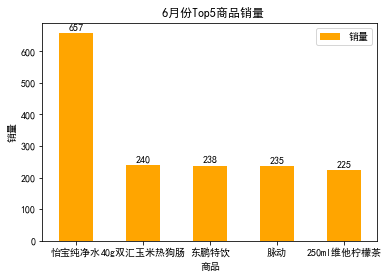

In [10]:
# 绘制柱状图
sales_Top5.plot.bar(x="商品",y="销量",color='orange' ,rot = 0, title=" 6月份Top5商品销量")
for x,y in enumerate(sales_Top5["销量"].values):
    plt.text(x, y+4,y, ha='center', va= 'bottom')
plt.xlabel('商品')
plt.ylabel('销量')
plt.savefig(r'.\可视化结果\6月份Top5销量条形图.png')
plt.show()

### 任务2.2 绘制每台售货机每月总交易额折线图及交易额月环比增长率柱状图

In [11]:
# 计算一台机器 12 个月的交易额
def month_amount (name, data):
    '''
    name: 机器编号
    data: 交易数据
    '''
    a_month_sales = list(map(lambda x : data[(data['支付时间']>=x) & 
                        (data['支付时间']<x + relativedelta(months= +1))], all_months)) # 该机器每月的销售数据
    
    # 计算每个月交易额
    amcount_table[name] = list(map(lambda x: x['应付金额'].sum(), a_month_sales))

# 构建透视表
amcount_table = pd.DataFrame({'月份':[i for i in range(1,13)]})#index=[str(i+1) + '月' for i in range(12)]
for i,data in enumerate(t_list):
    name = chr(65+i)
    month_amount (name, data)

# 显示每台售货机每月交易额
amcount_table.head(12)

月份       A       B       C       D        E
0    1  1509.7  1373.6  1640.5   956.4   1656.8
1    2   440.5   602.3   792.0   435.5    938.7
2    3   914.3   957.9   995.5   826.7   1507.0
3    4  1804.5  2457.4  3232.3  1679.1   3723.1
4    5  3385.1  3681.2  3729.4  2392.1   5699.0
5    6  6755.1  7550.3  8472.2  4187.0   9899.7
6    7  1950.5  1518.6  3047.1  1340.8   3186.4
7    8  2236.9  3516.1  4927.2  2371.3   6722.5
8    9  4479.5  7207.3  7429.0  3833.1  17054.3
9   10  6292.4  8331.6  9469.7  4606.7  10208.6
10  11  5187.0  8669.9  8456.7  4673.4  21501.8
11  12  7587.1  8104.1  9380.5  5941.2  13557.5

D:\Anaconda3\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


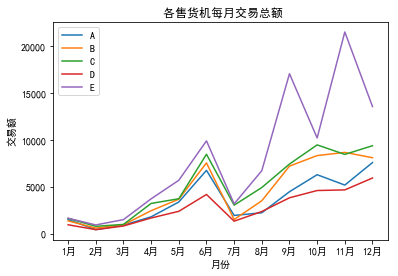

In [12]:
# 绘制折线
month = [i for i in range(1,13)]
name = [str(i)+'月' for i in range(1,13)]
amcount_table.plot(x='月份', y=['A','B','C','D','E'],title=" 各售货机每月交易总额")
plt.xticks(month,name)
plt.xlabel('月份')
plt.ylabel('交易额')
plt.savefig(r'.\可视化结果\各售货机每月交易总额折线图.png')
plt.show()

In [13]:
# 计算月环比增长率
month = [i for i in range(2,13)]
data = amcount_table.loc[:,['A','B','C','D','E']].values
tong_bi = np.zeros((11,5))
for i in range(0,len(data)):
    if i == 0:
        continue
    else:
        tong_bi[:][i-1] = (data[:][i] - data[:][i-1])/data[:][i-1]
        #format(res,'.2%') 小数格式化为百分数
growth_rate = pd.DataFrame(tong_bi,columns=list('ABCDE'))
growth_rate = growth_rate.round(2)
growth_rate['月份'] = [str(i)+'月' for i in range(2,13)]

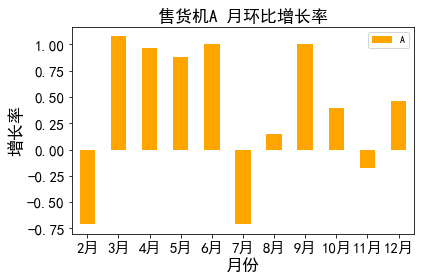

In [14]:
# 售货机A月环比增长率
growth_rate.plot.bar(x='月份',y="A",color='orange' ,rot = 0, fontsize=15)
plt.xlabel('月份',fontsize=17)
plt.ylabel('增长率',fontsize=17)
plt.title("售货机A 月环比增长率",fontsize=17)
plt.tight_layout()
plt.savefig(r'.\可视化结果\售货机A月环比增长率.png')
plt.show()

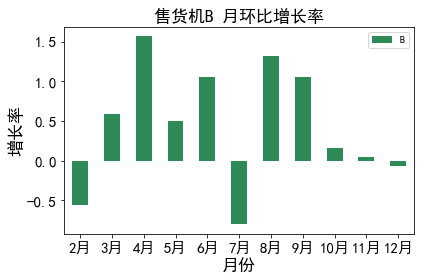

In [15]:
# 售货机B月环比增长率
growth_rate.plot.bar(x='月份',y="B",color='seagreen' ,rot = 0, fontsize=15)
plt.xlabel('月份',fontsize=17)
plt.ylabel('增长率',fontsize=17)
plt.title("售货机B 月环比增长率",fontsize=17)
plt.tight_layout()
plt.savefig(r'.\可视化结果\售货机B月环比增长率.png')
plt.show()

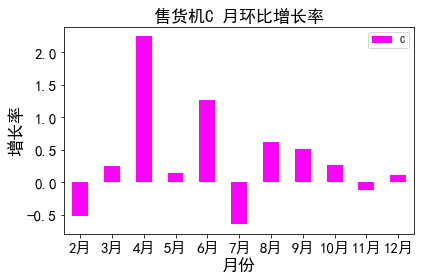

In [16]:
# 售货机C月环比增长率
growth_rate.plot.bar(x='月份',y="C",color='fuchsia' ,rot = 0, fontsize=15)
plt.xlabel('月份',fontsize=17)
plt.ylabel('增长率',fontsize=17)
plt.title("售货机C 月环比增长率",fontsize=17)
plt.tight_layout()
plt.savefig(r'.\可视化结果\售货机C月环比增长率.png')
plt.show()

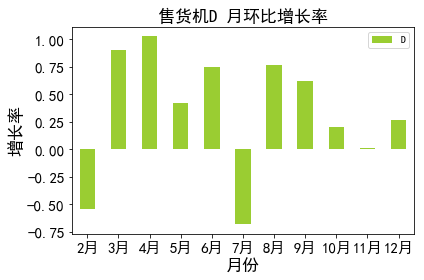

In [17]:
# 售货机D月环比增长率
growth_rate.plot.bar(x='月份',y="D",color='yellowgreen' ,rot = 0, fontsize=15)
plt.xlabel('月份',fontsize=17)
plt.ylabel('增长率',fontsize=17)
plt.title("售货机D 月环比增长率",fontsize=17)
plt.tight_layout()
plt.savefig(r'.\可视化结果\售货机D月环比增长率.png')
plt.show()

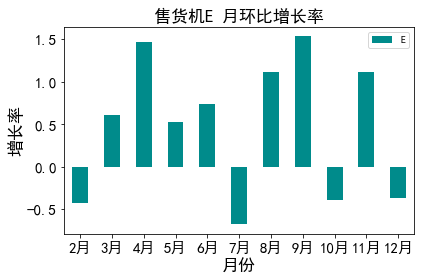

In [18]:
# 售货机E月环比增长率
growth_rate.plot.bar(x='月份',y="E",color='darkcyan' ,rot = 0, fontsize=15)
plt.xlabel('月份',fontsize=17)
plt.ylabel('增长率',fontsize=17)
plt.title("售货机E 月环比增长率",fontsize=17)
plt.tight_layout()
plt.savefig(r'.\可视化结果\售货机E月环比增长率.png')
plt.show()

### 2.3 绘制每台售货机毛利润占总毛利润比例的饼图(假设饮料类毛利润为25%，非饮料类为20%)

In [19]:
Total_revenue = sales_all.groupby(['地点', '大类'])['应付金额'].sum() # 各机器各类总收入
data = Total_revenue.values.reshape((5,2)) # 各机器各类总收入数据
# 计算利润
profit_infos = pd.DataFrame(data, columns= ['非饮料类毛利润', '饮料类毛利润']) # 用来存储利润信息
profit_infos['非饮料类毛利润'] = profit_infos['非饮料类毛利润'] * 0.25
profit_infos['饮料类毛利润'] = profit_infos['饮料类毛利润'] * 0.2
profit_infos['总毛利润'] = profit_infos.sum(axis=1)
profit_infos.insert(0,'地点',list('ABCDE'))
profit_infos.head()

地点   非饮料类毛利润    饮料类毛利润       总毛利润
0  A  4640.325   4796.26   9436.585
1  B  4743.775   6999.04  11742.815
2  C  5504.300   7910.98  13415.280
3  D  3037.425   4218.72   7256.145
4  E  7863.100  12840.60  20703.700

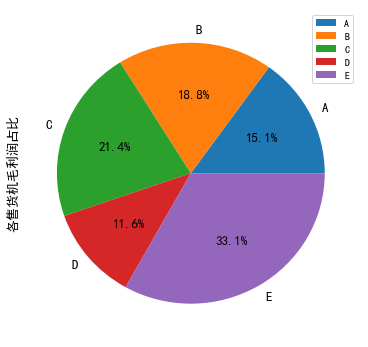

In [20]:
# 绘制饼图

profit_infos.plot.pie(y='总毛利润' ,labels = profit_infos['地点'].values, autopct = '%1.1f%%', figsize=(6, 6), fontsize=13)#,lable = '地点'
plt.ylabel('各售货机毛利润占比',fontsize=13)
plt.savefig(r'.\可视化结果\各售货机毛利润占比饼图.png')
plt.show()

### 任务2.4 绘制每月交易额均值气泡图，横轴为时间，纵轴为商品的二级类目

In [21]:
months = sales_all['支付时间'].map(lambda x:str(x.month)+'月') # 提取月份信息
each_class_infos = sales_all.groupby([months ,sales_all['二级类']])['应付金额'].sum()
size = (len(sales_all['二级类'].unique()), 12)

# 构建存放每月各类商品交易额均值的表
columns= [str(i)+'月' for i in range(1,13)]
infos_table = pd.DataFrame(np.zeros(size), columns= columns, index=sales_all['二级类'].unique())

# 将each_class_infos中每月各类商品交易额均值存入infos_table中
for m in columns:
    index = each_class_infos[m].index.values.tolist()
    
    if m in ['1月','3月','5月','7月','8月','10月','12月']:
        infos_table.loc[index,m] = each_class_infos[m].values/31
    elif m in ['4月','6月','9月','11月']:
        infos_table.loc[index,m] = each_class_infos[m].values/30
    else:
        infos_table.loc[index,m] = each_class_infos[m].values/28
infos_table.round(2) 

1月     2月     3月     4月     5月      6月     7月      8月      9月  \
饼干糕点      27.61   3.88   8.32  42.92  79.13  128.18  32.10   28.66  118.60   
肉干/豆制品/蛋  25.89   7.82  15.41  47.27  81.85  145.96  44.29   45.08  119.16   
方便速食      14.74   4.39  11.15  27.48  65.24  100.32  28.73   24.94   82.74   
膨化食品      10.49   0.42   4.68  20.05  51.33   93.32  17.27   10.56   53.14   
碳酸饮料      12.38  11.73  13.74  26.72  25.59   69.61  20.92   63.43  102.62   
乳制品       37.03  12.25  19.19  61.91  85.54  180.18  50.79   70.30  196.42   
茶饮料       28.97  24.45  32.69  68.02  62.52  163.50  57.31  138.81  205.00   
水          9.85   7.44   6.99  19.01  12.45   59.84  12.79   50.69   74.31   
果蔬饮料       7.00   6.45   4.52  13.10  17.85   29.70   9.56   27.39   52.77   
坚果炒货       1.61   0.00   0.68   1.03   2.57    4.89   1.98    0.00    3.62   
植物蛋白       8.49   2.27   6.35  14.62  19.63   49.90  12.30    8.73   39.89   
功能饮料      23.18  23.70  30.81  51.94  53.49  121.79  38.10  118.45  166.13   
咖啡         5.47   0.84   1.08   9.88  19.69   17.17   7.42    4.97   35.47   
糖果/巧克力     1.72   0.14   0.76   2.60   4.26    8.02   3.51    1.28    5.74   
海味零食       1.96   0.52   1.37   3.98   7.18   12.39   2.51    3.50    9.27   
纸巾         0.62   0.00   0.37   1.63   1.86    2.82   0.77    1.30    3.01   
香烟         5.32   2.61   2.90   2.50   0.74    7.60   1.61    9.06   16.17   
蜜饯/果干      7.74   5.71   6.61  14.31  17.29   32.93  12.72   29.69   40.77   
果冻/龟苓膏     0.16   0.00   0.16   0.90   1.03    0.57   0.71    0.00    3.60   
其他         0.00   0.00   0.00   0.01   0.00    0.11   0.84    1.03    5.01   

             10月     11月     12月  
饼干糕点      102.39  133.37   94.47  
肉干/豆制品/蛋  147.39  133.26  125.41  
方便速食       79.69  118.24   87.76  
膨化食品       62.86   61.69   56.21  
碳酸饮料       80.51  120.20  114.66  
乳制品       179.17  242.62  174.41  
茶饮料       210.08  257.20  251.71  
水          66.71   70.23   66.45  
果蔬饮料       41.69   65.12   47.18  
坚果炒货        2.57    5.48    3.02  
植物蛋白       41.55   40.53   43.50  
功能饮料      142.06  210.75  226.64  
咖啡         21.77   41.77   28.97  
糖果/巧克力      8.59    8.89    3.82  
海味零食       11.93   15.84   12.27  
纸巾          2.55    4.39    2.79  
香烟          7.61   22.17   29.35  
蜜饯/果干      43.01   55.15   66.67  
果冻/龟苓膏      0.97    2.20    1.77  
其他          2.00    7.19    0.70

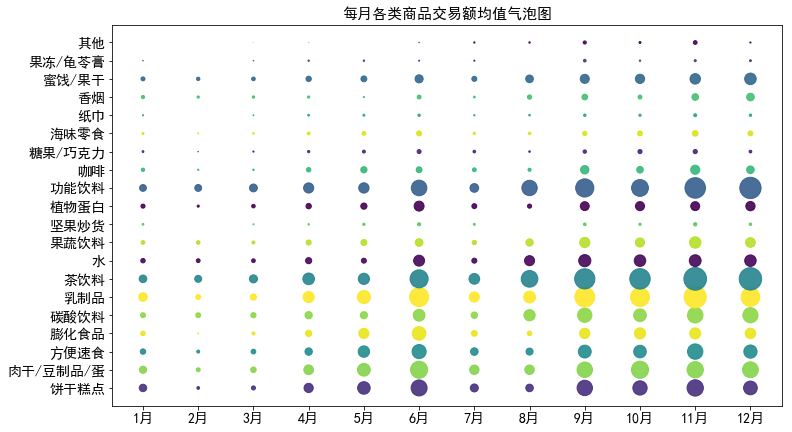

In [36]:
# 绘制气泡图
x_index = [ i+1 for i in range(len(infos_table.columns))]
y_index= [ i+1 for i in range(len(infos_table.index))]
x,y = np.meshgrid(x_index, y_index)
c_x =  np.random.rand(len(x_index))
c_y = np.random.rand(len(y_index))
c_x, c_y = np.meshgrid(c_x, c_y)
size = infos_table.values
plt.figure(figsize=(12,7))
plt.scatter(x, y, s = size*2, alpha = 0.9, c = c_y)
plt.title('每月各类商品交易额均值气泡图',fontsize=15)
plt.xticks(x_index, infos_table.columns, fontsize=14)
plt.yticks(y_index, infos_table.index, fontsize=14)
#plt.tight_layout()
plt.savefig(r'.\可视化结果\每月各类商品交易额均值气泡图.png')
plt.show()

### 任务2.5 绘制C售货机6、7、8三个月订单量的热力图，横轴以天为单位，纵轴以小时为单位

In [23]:
# 获取C售货机所输入月份的销售信息
def get_month_order_table(month):
    low = datetime(2017,month,1,0)
    high = datetime(2017,month+1,1,0)
    month_infos = sales_C[(sales_C['支付时间']>=low) & (sales_C['支付时间']<high)] # 六月销售信息
    days = month_infos['支付时间'].map(lambda x:str(x.day)+'日') # 提取月份信息
    hours = month_infos['支付时间'].map(lambda x:str(x.hour)+'时')
    month_sale_infos = sales_all.groupby([days, hours]).size()
    
    if month in [1,3,5,7,8,10,12]:
        columns= [str(i)+'日' for i in range(1,32)]
        indexs = [str(i)+'时' for i in range(24)]
        size = (24,31)
    elif month  in [4,6,9,11]:
        columns= [str(i)+'日' for i in range(1,31)]
        indexs = [str(i)+'时' for i in range(24)]
        size = (24,30)
    else:
        columns= [str(i)+'日' for i in range(1,29)]
        indexs = [str(i)+'时' for i in range(24)]
        size = (24,28)
    # 构建存放每月各类商品交易额均值的表
    month_order_table = pd.DataFrame(np.zeros(size), columns= columns, index=indexs)
    for m in columns:
        # 如果该日没有交易，筛选信息会报错
        try:
            index = month_sale_infos[m].index.values.tolist()
            month_order_table.loc[index,m] = month_sale_infos[m]
        except:
            continue
    
    return month_order_table

# 获取C售货机所6月份的销售信息
June_order_table = get_month_order_table(6)
June_order_table

1日    2日    3日   4日    5日    6日   7日   8日   9日  10日  ...   21日   22日  \
0时    6.0   2.0   2.0  0.0   1.0   5.0  0.0  1.0  1.0  0.0  ...   1.0   2.0   
1时    0.0   1.0   0.0  1.0   0.0   2.0  0.0  0.0  0.0  1.0  ...   0.0   3.0   
2时    1.0   1.0   0.0  2.0   0.0   0.0  2.0  0.0  0.0  0.0  ...   2.0   0.0   
3时    0.0   1.0   3.0  0.0   3.0   0.0  0.0  2.0  1.0  0.0  ...   0.0   0.0   
4时    2.0   0.0   0.0  0.0   0.0   5.0  1.0  0.0  1.0  0.0  ...   0.0   0.0   
5时    0.0   0.0   0.0  0.0   0.0   0.0  0.0  0.0  0.0  0.0  ...   3.0   0.0   
6时    0.0   0.0   0.0  0.0   0.0   0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   
7时    6.0   2.0   2.0  2.0   1.0   2.0  4.0  2.0  2.0  2.0  ...   2.0   4.0   
8时    4.0   2.0   2.0  2.0   4.0   5.0  4.0  4.0  2.0  0.0  ...   2.0   4.0   
9时   11.0   5.0   3.0  7.0  13.0   4.0  8.0  4.0  1.0  3.0  ...   5.0   2.0   
10时   2.0   3.0   1.0  1.0   5.0   1.0  1.0  0.0  2.0  1.0  ...   2.0   2.0   
11时   3.0   2.0   5.0  1.0   1.0   3.0  4.0  2.0  2.0  2.0  ...   1.0   2.0   
12时   4.0  10.0   1.0  7.0  10.0   5.0  8.0  0.0  2.0  2.0  ...   8.0  12.0   
13时   5.0   2.0   1.0  4.0  10.0   3.0  9.0  4.0  4.0  5.0  ...   6.0   3.0   
14时   3.0  10.0   5.0  6.0   5.0   2.0  2.0  2.0  6.0  6.0  ...   4.0   4.0   
15时   1.0   9.0   5.0  8.0  11.0   4.0  1.0  3.0  5.0  8.0  ...   1.0   6.0   
16时   2.0   4.0   6.0  7.0   7.0   3.0  6.0  4.0  2.0  4.0  ...   1.0   2.0   
17时   3.0   7.0   5.0  8.0   9.0   0.0  2.0  1.0  2.0  3.0  ...   5.0   7.0   
18时   7.0   2.0   2.0  4.0  13.0   5.0  5.0  8.0  2.0  3.0  ...   3.0   5.0   
19时  11.0   2.0   9.0  7.0  14.0   4.0  0.0  5.0  4.0  2.0  ...   0.0   3.0   
20时   5.0   4.0   2.0  4.0   3.0   3.0  4.0  7.0  2.0  0.0  ...   1.0   2.0   
21时   2.0   5.0  15.0  1.0   0.0  10.0  8.0  0.0  3.0  3.0  ...   4.0   1.0   
22时  13.0   0.0   3.0  5.0   0.0   8.0  4.0  2.0  2.0  0.0  ...   3.0   5.0   
23时   5.0   7.0   2.0  2.0   3.0   1.0  5.0  2.0  2.0  0.0  ...   2.0   1.0   

      23日   24日  25日  26日   27日   28日  29日   30日  
0时    0.0   3.0  1.0  1.0   1.0   1.0  0.0   4.0  
1时    3.0   3.0  0.0  2.0   1.0   0.0  1.0   0.0  
2时    1.0   1.0  1.0  0.0   1.0   2.0  1.0   1.0  
3时    0.0   0.0  4.0  0.0   0.0   0.0  2.0   5.0  
4时    2.0   1.0  2.0  2.0   1.0   2.0  2.0   8.0  
5时    0.0   0.0  0.0  0.0   0.0   0.0  0.0   3.0  
6时    0.0   0.0  0.0  2.0   0.0   0.0  0.0   5.0  
7时    3.0   1.0  1.0  0.0   4.0   1.0  1.0   5.0  
8时    0.0   1.0  4.0  0.0   1.0   2.0  4.0   8.0  
9时    4.0   3.0  3.0  3.0   2.0   4.0  0.0   4.0  
10时   0.0   4.0  3.0  5.0   2.0   4.0  2.0   8.0  
11时   1.0   0.0  1.0  1.0   1.0   1.0  3.0   1.0  
12时   1.0   5.0  1.0  5.0   4.0   2.0  4.0  12.0  
13时   3.0   4.0  2.0  2.0   3.0   5.0  4.0   3.0  
14时   0.0   7.0  0.0  4.0   1.0   3.0  2.0  11.0  
15时  10.0  10.0  6.0  3.0  10.0   1.0  1.0  11.0  
16时  20.0  19.0  1.0  7.0  18.0  12.0  3.0   4.0  
17时   5.0   7.0  6.0  8.0   4.0   6.0  4.0  12.0  
18时   5.0   1.0  3.0  7.0   1.0   5.0  6.0   5.0  
19时   6.0   1.0  0.0  4.0   0.0   1.0  3.0   0.0  
20时   1.0   2.0  0.0  1.0   2.0   2.0  2.0  10.0  
21时   5.0   1.0  0.0  2.0   0.0   8.0  4.0   5.0  
22时   4.0   2.0  3.0  0.0   5.0   0.0  8.0   3.0  
23时   3.0   0.0  0.0  1.0   4.0   5.0  1.0   8.0  

[24 rows x 30 columns]

In [51]:
# 绘制六月份每天各时段订单量
data = June_order_table.values
f,ax = plt.subplots(figsize = (15,6), nrows = 1)
sns.heatmap(data, linewidths = 0.05, ax = ax , cmap=plt.cm.rainbow)#cmap = 'rainbow'
ax.set_title('6月C售货机各时段订单量热力图',fontsize='17')
ax.set_xlabel('日期',fontsize='15')
ax.set_ylabel('小时',fontsize='15')
ax.set_xticklabels( June_order_table.columns, fontsize='14')
ax.set_yticklabels(June_order_table.index, rotation = 0, fontsize='14')
plt.tight_layout()
plt.savefig(r'.\可视化结果\6月C售货机各时段订单量热力图.png')
plt.show()

In [25]:
# 获取总表7月份的销售信息
July_order_table = get_month_order_table(7)
July_order_table

1日   2日    3日    4日    5日   6日   7日   8日   9日  10日  ...   22日   23日  \
0时    4.0  0.0   0.0   0.0   0.0  0.0  1.0  0.0  0.0  0.0  ...   0.0   0.0   
1时    0.0  0.0   0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   
2时    0.0  0.0   0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   
3时    1.0  0.0   0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   
4时    0.0  0.0   0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   
5时    0.0  0.0   0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   
6时    0.0  0.0   0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   
7时    0.0  0.0   0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   
8时    1.0  3.0   0.0   2.0   2.0  0.0  1.0  0.0  2.0  0.0  ...   0.0   0.0   
9时    3.0  2.0   3.0   2.0  10.0  0.0  1.0  2.0  0.0  0.0  ...   0.0   2.0   
10时   0.0  0.0   0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   
11时   0.0  1.0   3.0   0.0   1.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   
12时   5.0  0.0   0.0   4.0   8.0  0.0  0.0  0.0  0.0  0.0  ...   1.0   0.0   
13时  10.0  0.0   3.0   1.0   1.0  0.0  0.0  3.0  1.0  0.0  ...   0.0   0.0   
14时   2.0  4.0   2.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   
15时  12.0  4.0   1.0   2.0   0.0  0.0  1.0  0.0  0.0  0.0  ...   0.0   3.0   
16时   2.0  1.0   2.0   9.0   4.0  0.0  0.0  6.0  0.0  0.0  ...   0.0  33.0   
17时   2.0  2.0   0.0   3.0   2.0  0.0  1.0  0.0  0.0  0.0  ...   0.0   4.0   
18时   0.0  0.0   0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   3.0   
19时   3.0  9.0   1.0  15.0   6.0  1.0  1.0  4.0  0.0  0.0  ...   0.0   2.0   
20时   2.0  3.0   3.0   5.0   0.0  0.0  6.0  0.0  0.0  0.0  ...   0.0   1.0   
21时   1.0  6.0  13.0   1.0   0.0  0.0  7.0  0.0  0.0  0.0  ...   0.0   0.0   
22时   0.0  2.0   2.0   1.0   0.0  0.0  6.0  0.0  0.0  0.0  ...   0.0   0.0   
23时   0.0  3.0   0.0   1.0   0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   

      24日   25日   26日   27日   28日  29日   30日   31日  
0时    0.0   0.0   0.0   0.0   0.0  0.0   0.0   0.0  
1时    0.0   0.0   0.0   0.0   0.0  0.0   0.0   0.0  
2时    0.0   0.0   0.0   0.0   0.0  0.0   0.0   0.0  
3时    0.0   0.0   0.0   0.0   0.0  0.0   3.0   0.0  
4时    0.0   0.0   0.0   0.0   0.0  0.0   2.0   0.0  
5时    0.0   0.0   0.0   0.0   0.0  0.0   0.0   0.0  
6时    0.0   0.0   0.0   0.0   0.0  0.0   0.0   0.0  
7时    0.0   2.0   0.0   1.0   0.0  0.0   0.0   0.0  
8时    2.0   2.0   1.0   2.0   0.0  2.0  12.0   1.0  
9时    1.0   2.0   4.0   3.0   3.0  2.0   9.0   3.0  
10时   3.0   3.0   1.0   3.0   0.0  2.0   0.0   1.0  
11时  11.0   4.0   2.0   0.0   1.0  0.0   1.0   1.0  
12时   7.0   6.0   1.0   1.0   0.0  0.0   4.0  12.0  
13时   5.0   2.0   0.0   3.0   2.0  2.0   1.0   1.0  
14时  10.0   3.0   3.0   0.0   0.0  1.0   6.0   4.0  
15时   2.0  11.0   4.0  10.0   0.0  3.0   1.0   4.0  
16时  22.0  10.0  10.0  27.0  16.0  2.0   4.0   9.0  
17时  13.0   3.0   1.0   8.0   2.0  2.0   0.0   3.0  
18时   2.0   2.0   3.0   4.0   4.0  0.0   4.0   2.0  
19时   0.0   2.0   1.0  10.0   2.0  0.0   4.0   1.0  
20时   0.0   0.0   1.0   2.0   0.0  0.0   9.0   5.0  
21时   0.0   0.0   0.0   0.0   0.0  0.0  11.0   4.0  
22时   0.0   0.0   0.0   1.0   0.0  0.0   0.0   1.0  
23时   0.0   0.0   0.0   3.0   0.0  0.0   0.0   0.0  

[24 rows x 31 columns]

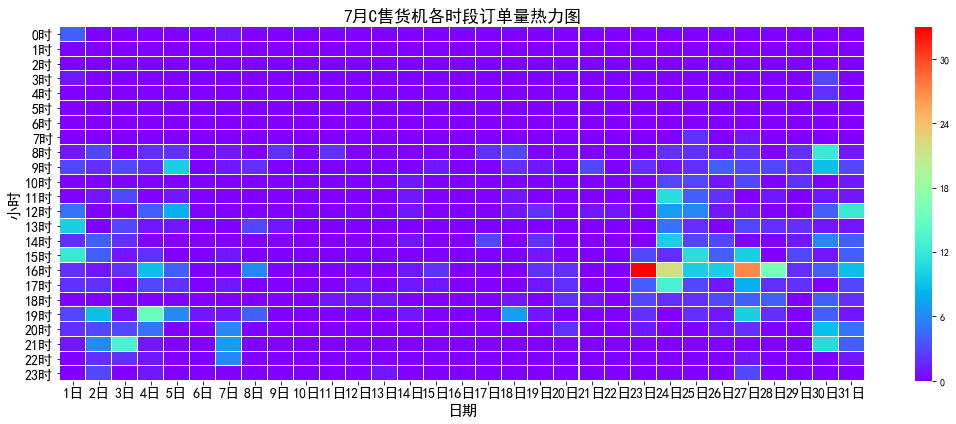

In [49]:
# 绘制七月份每天各时段订单量
data = July_order_table.values
f,ax = plt.subplots(figsize = (15,6), nrows = 1)
sns.heatmap(data, linewidths = 0.05, ax = ax , cmap=plt.cm.rainbow)#cmap = 'rainbow'
ax.set_title('7月C售货机各时段订单量热力图',fontsize='17')
ax.set_xlabel('日期',fontsize='15')
ax.set_ylabel('小时',fontsize='15')
ax.set_xticklabels( July_order_table.columns, fontsize='14')
ax.set_yticklabels(July_order_table.index, rotation = 0, fontsize='14')
plt.tight_layout()
plt.savefig(r'.\可视化结果\7月C售货机各时段订单量热力图.png')
plt.show()

In [27]:
# 获取总表8月份的销售信息
August_order_table = get_month_order_table(8)
August_order_table

1日   2日   3日   4日   5日   6日    7日   8日   9日  10日 ...    22日  23日   24日  \
0时   0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0 ...    0.0  1.0   1.0   
1时   0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0 ...    0.0  0.0   0.0   
2时   1.0  0.0  2.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0 ...    0.0  0.0   0.0   
3时   0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0 ...    1.0  0.0   0.0   
4时   1.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0 ...    0.0  0.0   0.0   
5时   2.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0 ...    0.0  0.0   0.0   
6时   0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0 ...    0.0  0.0   0.0   
7时   0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0 ...    2.0  0.0   0.0   
8时   1.0  2.0  1.0  4.0  3.0  1.0   1.0  3.0  1.0  0.0 ...    1.0  3.0   1.0   
9时   1.0  2.0  2.0  5.0  5.0  3.0   7.0  7.0  4.0  1.0 ...    4.0  3.0   1.0   
10时  0.0  2.0  2.0  1.0  0.0  4.0   3.0  1.0  1.0  1.0 ...    0.0  4.0   0.0   
11时  1.0  0.0  1.0  3.0  1.0  2.0   6.0  2.0  2.0  2.0 ...    0.0  0.0   0.0   
12时  3.0  4.0  0.0  5.0  7.0  3.0  10.0  5.0  7.0  0.0 ...    3.0  1.0   0.0   
13时  2.0  4.0  1.0  1.0  2.0  4.0   1.0  3.0  1.0  2.0 ...    2.0  1.0   0.0   
14时  3.0  2.0  0.0  2.0  4.0  4.0   0.0  2.0  3.0  0.0 ...    4.0  0.0   1.0   
15时  3.0  3.0  1.0  3.0  3.0  4.0   6.0  5.0  1.0  0.0 ...    1.0  2.0   4.0   
16时  5.0  1.0  5.0  3.0  9.0  4.0   8.0  3.0  2.0  1.0 ...    0.0  4.0   1.0   
17时  2.0  2.0  6.0  3.0  4.0  3.0   2.0  6.0  2.0  0.0 ...   10.0  0.0  12.0   
18时  1.0  6.0  6.0  6.0  8.0  9.0   2.0  4.0  2.0  2.0 ...    0.0  3.0   1.0   
19时  0.0  0.0  5.0  3.0  2.0  5.0   9.0  0.0  1.0  0.0 ...    0.0  2.0   1.0   
20时  3.0  1.0  1.0  1.0  1.0  2.0   4.0  0.0  2.0  0.0 ...    0.0  2.0   0.0   
21时  1.0  0.0  3.0  0.0  0.0  0.0   1.0  1.0  0.0  0.0 ...    1.0  3.0   2.0   
22时  1.0  0.0  0.0  0.0  1.0  1.0   0.0  0.0  1.0  0.0 ...    0.0  0.0   2.0   
23时  0.0  1.0  0.0  0.0  2.0  1.0   0.0  0.0  0.0  1.0 ...    2.0  0.0   1.0   

      25日  26日  27日  28日  29日  30日  31日  
0时    0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1时    0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2时    0.0  0.0  0.0  0.0  0.0  0.0  2.0  
3时    0.0  0.0  0.0  0.0  0.0  0.0  0.0  
4时    0.0  0.0  0.0  0.0  0.0  0.0  0.0  
5时    0.0  0.0  0.0  0.0  0.0  0.0  1.0  
6时    0.0  0.0  0.0  0.0  0.0  0.0  0.0  
7时    1.0  0.0  1.0  1.0  0.0  1.0  0.0  
8时    0.0  0.0  1.0  1.0  2.0  0.0  0.0  
9时    2.0  2.0  2.0  6.0  1.0  4.0  0.0  
10时   4.0  0.0  2.0  1.0  0.0  0.0  0.0  
11时   2.0  0.0  0.0  0.0  3.0  0.0  0.0  
12时   3.0  1.0  4.0  1.0  0.0  1.0  0.0  
13时   3.0  1.0  1.0  2.0  3.0  1.0  0.0  
14时   1.0  2.0  1.0  2.0  0.0  0.0  0.0  
15时   5.0  1.0  0.0  1.0  2.0  0.0  0.0  
16时   6.0  0.0  1.0  2.0  2.0  8.0  0.0  
17时   8.0  0.0  2.0  1.0  2.0  2.0  2.0  
18时  10.0  0.0  1.0  1.0  1.0  0.0  0.0  
19时   0.0  1.0  1.0  2.0  1.0  0.0  0.0  
20时   0.0  3.0  1.0  2.0  0.0  3.0  1.0  
21时   1.0  0.0  1.0  2.0  0.0  0.0  3.0  
22时   0.0  1.0  4.0  1.0  0.0  1.0  0.0  
23时   0.0  0.0  1.0  0.0  0.0  0.0  2.0  

[24 rows x 31 columns]

In [50]:
# 绘制八月份每天各时段订单量
data = August_order_table.values
f,ax = plt.subplots(figsize = (15,6), nrows = 1)
sns.heatmap(data, linewidths = 0.05, ax = ax , cmap=plt.cm.rainbow)#cmap = 'rainbow'
ax.set_title('8月C售货机各时段订单量热力图',fontsize='17')
ax.set_xlabel('日期',fontsize='15')
ax.set_ylabel('小时',fontsize='15')
ax.set_xticklabels( August_order_table.columns, fontsize='14')
ax.set_yticklabels(August_order_table.index, rotation = 0, fontsize='14')
plt.tight_layout()
plt.savefig(r'.\可视化结果\8月C售货机各时段订单量热力图.png')
plt.show()